In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import probplot
import random
from scipy.stats import chi2_contingency
import statsmodels.formula.api as smf
from sympy import solve, symbols
%matplotlib inline

# 1. Distributions (constructed by np.random)

In [ ]:
np.random.chioce(array, size=n, replace=True) # sample from the array  # when replace=False <=> random.sample(array, size)

np.random.normal(mean, std, size=n) # Normal Distribution
np.random.uniform(low, high, size=n) # Continuous Uniform Distribution
np.random.randint(low, high, size=n) # Discrete Uniform Distribution, randomn integers from [low, high]

np.random.randn(size) # <=> np.random.standard_normal(size) , sample of z-distribution i.e. N ~ (0, 1)
np.random.ranf(size) # random floats in [0, 1), i.e. Unif[0,1)   # <=> np.random.random <=> np.random.sample
# Sample from Unif[a,b) : np.random.ranf(size) * (b-a) + a  <=> np.random.uniform(low, high, size=n)

## 1.1 Discrete Uniform Distribution

7    125916
8    125038
4    125018
2    124966
5    124920
3    124861
6    124724
9    124557
dtype: int64


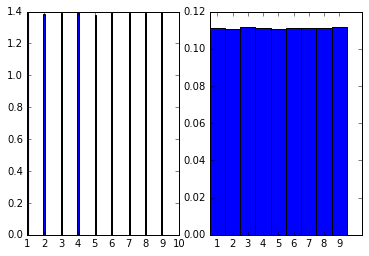

In [15]:
DUdis=pd.Series(np.random.randint(1,10,size=1000000))
plt.subplot(1,2,1)
DUdis_hist=plt.hist(DUdis,bins=100,normed=True)
print DURV.value_counts()
xticks=np.array(DUdis.value_counts().index)
x_DU=xticks-1
y_DU=DUdis.value_counts()/1000000.0
width=1
plt.subplot(1,2,2)
DUdis_bar=plt.bar(x_DU,y_DU,width=width)
plt.xlim(0,10)
xticks_=plt.xticks(x_DU+0.5*width, xticks)
# We don't draw histogram here, because there are only lines.

In [18]:
print 'The mean is',DUdis.mean()
print 'The standard deviation is',DUdis.std()

The mean is 5.002665
The standard deviation is 2.58315134048


## 1.2 Continuous Uniform Distribution

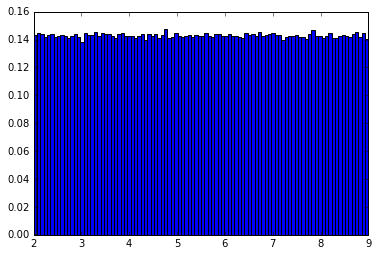

In [17]:
CUdis=np.random.uniform(low=2.0,high=9.0,size=1000000)
CUdis_hist=plt.hist(CUdis,bins=100,normed=True)

## 1.3 Normal Distribution

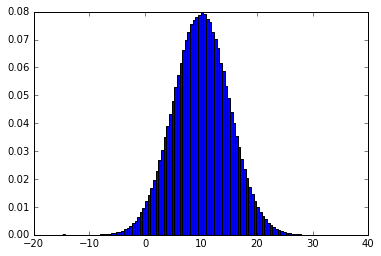

In [19]:
Ndis=np.random.normal(10,5,size=1000000)
Ndis_hist=plt.hist(Ndis,bins=100,normed=True)

# 2. Probability and Quantiles

## 2.1.1 Probability for normal distribution
**norm.cdf( value, mean, std )** $= P(X<value)$.</p>
1-**norm.cdf( value, mean, std )** $= P(X>value)$.

## 2.1.2 Probability for any distribution
**Run Simulation.**</p>
For $P(a<X<b)$

In [21]:
# take normal distribution as an example, a=0, b=7
A= np.random.normal(5,6,size=1000000)
B=A[A>0]
C=B[B<7]
print 'The probability is',len(C)/float(len(A))

The probability is 0.42901


## 2.2.1 Quantiles for normal distribution
**norm.ppf( percentage, mean, std )**$=k$, when $P(X<k)=$ percentage.

In [5]:
print norm.ppf(0.25, 10, 5)
print norm.ppf(0.5, 10, 5)
print norm.ppf(0.75, 10, 5)

6.62755124902
10.0
13.372448751


### Value at Risk (VaR)
VaR at the level of pct $=$ **norm.ppf** ( pct, mean, std )</p>
It means there's only *pct* chance to lose more than VaR.

## 2.2.2 Quantiles for continuous uniform distribution
For **Unif[a,b)**:
$$Probability\space Density=\frac{1}{b-a}$$

$$p\% \space Quantile=a + \frac{p\%}{Probability\space Density} = a + p\% * (b-a)$$

Example:</p>Suppose variable X follows continuous uniform  distribution on $[1,10]$. Find $k$ such that $P(X\le k)$ = 0.05.

In [7]:
# Consider the size extremely large
prob=0.05
prob_density=1.0/(10-1)
k1=1.0+prob/prob_density
print k1

1.45


## 2.2.3 Quantiles for any distribution
distribution=**pd.Series**(distribution)</p>
**distribution.quantile( q = [pct1, pct2, pct3] )**

In [6]:
# Quantiles for any distribution
norm_squared=pd.Series((np.random.normal(80,30,10000000))**2)
print norm_squared.quantile(q=[0.25,0.5,0.75])

0.25     3573.269435
0.50     6400.472643
0.75    10045.847724
dtype: float64


# 3. Sampling Distributions

## 3.1 Population is Normal
If population is normal $(\mu,\sigma^2)$ , sampling distribution will be normal too: $(\mu, \frac{\sigma^2}{n})$ 

### 3.1.1 Probability

**Question:** The monthly salary of staffs in HKUST, follows a normal distrubution with $\mu=50,000$ and $\sigma=30,000$. We randomly select 15 professors, what is the chance that their average salary is higher 55000?

### Method 1: norm.cdf (value, mean, std)
$$P(\bar{X}>55,000)=1-P(\bar{X}<55,000)=1-\space norm.cdf (55000, sample\space mean, SEM)$$ <p>
$$SEM=\frac{\sigma}{\sqrt n}$$

In [22]:
sem=30000/np.sqrt(15)
print 'The chance is', 1-norm.cdf(55000, 50000, sem)

The chance is 0.259302508214


### Method 2: Simulation - making an array of sample mean (the sampling distribution)
$$Prob=\frac{len(required)}{len(mean\space array)}$$

In [27]:
mean_list=[]
for k in range(1000000):
    sample=np.random.normal(50,30,size=15)
    mean_list.append(sample.mean())
mean_array=np.array(mean_list)
required_array=mean_array[mean_array>55]
print 'The chance is',len(required_array)/float(len(mean_array))

 The chance is 0.259489


### 3.1.2 Quantiles
As the sampling distribution is normal, we do as 2.2.1, use **norm.ppf( percentage, mean, std )**

## 3.2 Population is not Normal
**Central Limit Theorem**: The sample mean will be more and more like normal even if it is randomly drawed from a general population, as long as we increase the sample size.<p>
The sample mean is approximately normal ($\mu, \frac{\sigma^2}{n}$)
<p>

### 3.2.1 Probability

The chance of <11 is 0.3576


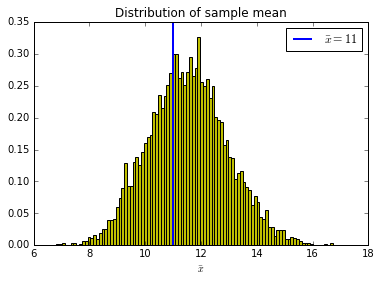

In [36]:
pop=[1,2,3,4,5,6,9,10,12,23,21,12,30,23]
mean_list=[]
for k in range(10000):
    sample=np.random.choice(pop,40,replace=True)
    mean_list.append(sample.mean())
sampling_hist=plt.hist(mean_list,bins=100,color='y',normed=True)
mean_array=np.array(mean_list)
required_array=mean_array[mean_array<11]
print 'The chance of <11 is',len(required_array)/float(len(mean_array))
plt.title("Distribution of sample mean")
plt.xlabel(r"$\bar{x}$")
plt.axvline(x=11,color='b',linewidth=2,label=r'$\bar{x}=11$')
plt.legend()

### 3.2.2 Quantiles
As the sampling distribution is not certainly normal, we do as 2.2.3, use **Series.quantile( q = [pct1, pct2, pct3] )**

In [37]:
mean_series=pd.Series(mean_array)
print mean_series.quantile(q=[0.25,0.5,0.75])

0.25    10.55
0.50    11.50
0.75    12.45
dtype: float64


# 4. Estimation of the Population Mean by Sampling

Either population is normal, or population is not normal but **sample size is large ($n>30$, really depends)**:</p>
$\bar{x}\rightarrow N(\mu,\frac{\sigma^2}{n})$, the 100(1-$\alpha$)% confidence interval for the population mean $\mu$ is
$$\left[\bar{x}-z_{\frac{\alpha}{2}}\frac{\sigma}{\sqrt{n}},\bar{x}+z_{\frac{\alpha}{2}}\frac{\sigma}{\sqrt{n}}\right]$$

## 4.1 Population is Normal

If $\sigma$ is known, the CI for sample mean is <p>$$\left[\bar{x}-z_{\frac{\alpha}{2}}\frac{\sigma}{\sqrt{n}},\bar{x}+z_{\frac{\alpha}{2}}\frac{\sigma}{\sqrt{n}}\right]$$ <p>
If $\sigma$ is unknown, use sample standard deviation instead, the CI is:<p>
$$\left[\bar{x}-z_{\frac{\alpha}{2}}\frac{s}{\sqrt{n}},\bar{x}+z_{\frac{\alpha}{2}}\frac{s}{\sqrt{n}}\right]$$ <p>
where $z_{\frac{\alpha}{2}}$ = **norm.ppf**(1-$\frac{\alpha}{2}$,0,1) , $s=$ **sample.std(ddof=1)**

In [ ]:
# pop normal, size=40, 90% CI
# pop std known
sample=np.random.choice(pop,40,replace=True)
left=sample.mean()-norm.ppf(0.95,0,1)*pop.std()/np.sqrt(40)
right=sample.mean()+norm.ppf(0.95,0,1)*pop.std()/np.sqrt(40)
print 'The 92% confidence interval for the mean of X3 is [{}, {}]'.format(left,right)
# pop std unknown
sample=np.random.choice(pop,40,replace=True)
left=sample.mean()-norm.ppf(0.95,0,1)*sample.std()/np.sqrt(40)
right=sample.mean()+norm.ppf(0.95,0,1)*sample.std()/np.sqrt(40)
print 'The 92% confidence interval for the mean of X3 is [{}, {}]'.format(left,right)

## 4.2 Population is not Normal

If $\sigma$ is known, given $n>30$, the CI for sample mean is <p>$$\left[\bar{x}-z_{\frac{\alpha}{2}}\frac{\sigma}{\sqrt{n}},\bar{x}+z_{\frac{\alpha}{2}}\frac{\sigma}{\sqrt{n}}\right]$$ <p>
If $\sigma$ is unknown, given $n>30$, the CI for sample mean is <p>$$\left[\bar{x}-t_{\frac{\alpha}{2},\space (n-1)}\frac{s}{\sqrt{n}},\bar{x}+t_{\frac{\alpha}{2},\space (n-1)}\frac{s}{\sqrt{n}}\right]$$ <p>
If $\sigma$ is unknown, given n **large enough** (now we consider $n>30$ enough), the CI for sample mean is <p>$$\left[\bar{x}-z_{\frac{\alpha}{2}}\frac{s}{\sqrt{n}},\bar{x}+z_{\frac{\alpha}{2}}\frac{s}{\sqrt{n}}\right]$$ <p>
where $z_{\frac{\alpha}{2}}$ = **norm.ppf**(1-$\frac{\alpha}{2}$,0,1) , $s=$ **sample.std(ddof=1)**. As for $t_{\frac{\alpha}{2},\space (n-1)}$, the t-distribution calculator or the t-table is needed.

In [ ]:
# pop not normal, size=40, 90% CI
# pop std known, size=40>30
sample=np.random.choice(pop,40,replace=True)
left=sample.mean()-norm.ppf(0.95,0,1)*pop.std()/np.sqrt(40)
right=sample.mean()+norm.ppf(0.95,0,1)*pop.std()/np.sqrt(40)
print 'The 92% confidence interval for the mean of X3 is [{}, {}]'.format(left,right)
# pop std unknown, size=40 considered not large enough
sample=np.random.choice(pop,40,replace=True)
left=sample.mean()-1.685*sample.std()/np.sqrt(40)
right=sample.mean()+1.685.ppf(0.95,0,1)*sample.std()/np.sqrt(40)
print 'The 92% confidence interval for the mean of X3 is [{}, {}]'.format(left,right)
# pop std unknown, size=40>30 and considered large enough
sample=np.random.choice(pop,40,replace=True)
left=sample.mean()-norm.ppf(0.95,0,1)*sample.std()/np.sqrt(40)
right=sample.mean()+norm.ppf(0.95,0,1)*sample.std()/np.sqrt(40)
print 'The 92% confidence interval for the mean of X3 is [{}, {}]'.format(left,right)